
# Project: Investigate a Dataset - [No_show-Aude_ArmelleDjofang]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
La base de données No_show appointment présente les informations des patients enregistrées à un rendez-vous médical au Bresil. Elle nous renseigne sur:
- PatientId: l'identité du patient(Code du patient);
- AppointmentID: code du rendez-vous;
- ScheduledDay: la date programmée du rendez vous; 
- AppointmentDate: la date à laquelle le rendez vous a été honoré;
- Age: age du patient;
- Neighbourhood: Location de l'hopital;
- Scholarship: indique si le patient bénéficie d'une assistance du programme brésilien;
- Hipertension: antécédent du patient par rapport à l'hypertension;
- Diabetes: le patient est-il diabétique?
- Alcoholism: le patient est-il alcolique?
- Handcap: le patient est-il handicapé?
- Sms_received le patient a t-il recu un sms de confirmation?
- No-show: si oui ou non  le patient n'a pas honoré  de son rendez-vous.


### Question(s) for Analysis
- Quelles sont les proportions de présences au rendez vous?
- Quels sont les jours qui enregistre plus d'absences?
- qui des diabetiques et des hypertendus sont plus absents au rendez vous?
- Est ce que recevoir un sms de rappel augmente les chances d'honorer au rendez vous?

- Importons les librairies dont nous avons besoin pour l'analyse

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Upgrade pandas to use dataframe.explode() function.

<a id='wrangling'></a>
## Data Wrangling

 - Telechargeons le fichier csv qui renferme les données sur le rendez vous des patients
 -  Affichons les premieres lignes du dataframe
 

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Inspectons la base de données afin de:
    - verifier les information colonne après colonne
    - Identifier le nombre de lignes et colonnes. 
    - Verifier s'il ya des valeurs manquantes par colonne
    - Identifier le type de caractère de chaque colonne

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Notre fichier comporte 110527 lignes et 14 columns(présentées à l'introduction). 
- Nous constatons que Hipertension, Handcap, No-show sont mal écris nous les corrigerons dans les lignes qui suivent. 
- PatientId est de type float pourtant il devrait etre de type int. 
- ScheduledDay et AppointmentDay doivent etre changer en Datetype
- Nous n'avons pas de valeurs manquantes

- Verifions les valeurs statistiques des données pour voir s'il ya des incohérences

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Nous constatons déja une incohérence au niveau de la colonne Age. La valeur minimale ici est de -1 pourtant l'age ne peut etre inférieur à zero.

- changeons le type données PatientId de float en Int avec astype et verifions avec dtypes 

In [5]:

df.PatientId=df.PatientId.astype(int)

df.PatientId.dtypes


dtype('int64')

- Le typage de PatientId a bien été changé en entier

- Verifions si la colonne Gender comporte uniquement les valeurs F et M

In [6]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

la colonne Gender n'as pas de valeur autre que F ou M

- Changeons le type données ScheduledDay de type object en datetime avec astype et verifions avec dtypes 

In [7]:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.dtypes

datetime64[ns, UTC]

- Changeons le type données AppointmentDay de type object en datetime avec astype et verifions avec dtypes 

In [8]:
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.AppointmentDay.dtypes

datetime64[ns, UTC]

- Le résumé statistique nous a affiché -1 comme valeur minimale au niveau de la colonne Age. Affichons les statistiques de la colonne Age et analysons les en profondeur 

In [9]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- Nous constatons que le minimum d'âge ici est -1 et pourtant l'âge ne saurait être négatif. vérifions donc combien de lignes contient la valeur -1

In [10]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

- -1  est enregistré sur pour une seule donnée comme Age. Nous pouvons donc la supprimer sans crainte

- Supprimons les âges inférieurs à zéro et vérifions que l'âge mininimale est zero 

In [11]:
 
df.drop(df[df.Age < 0].index,inplace=True)
df.Age.min()

0

- Vérifions que la colonne Scholarship contient uniquement les valeurs 0 ou 1 

In [12]:
df.Scholarship.unique()

array([0, 1])

La colonne Scholarship contient effectivement les valeurs uniques 0 ou 1

- Corrigeons  la colonne hypertension et vérifions

In [13]:
df= df.rename(columns={'Hipertension':'Hypertension'})
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- Renommons la colonne Handcap en Handicap

In [14]:
df= df.rename(columns={'Handcap':'Handicap'})
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

- No show est écrit avec un tiret de 6 corrigeons le

In [15]:
df= df.rename(columns={'No-show':'No_show'})
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

La colonne No-show a bien été corrigé et remplacé par No_show

- Verifions si notre base de données à des valeurs dupliquées

In [16]:
df.duplicated().sum()

0

- Aucune valeur dupliquée dans notre dataset donc nous pouvons explorer et analyser nos données.

##### <a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ( Quelles sont les proportions de présences au rendez vous?)




Definissons la fonction qui permettra de représenter graphiquement les proportions d'absence et de présence des patients selon le cas étudié.
 La fonction prend en paramètres le dataframe de l'etude et le titre du graphe


In [17]:
def draw_function(dataframe, titre='Proportion absence des diabetiques au rendez-vous'):
    import matplotlib.pyplot as plt
    df.No_show.value_counts().plot(kind='pie', autopct='%2.f%%')
    plt.title(titre)
    plt.legend()
    plt.show()

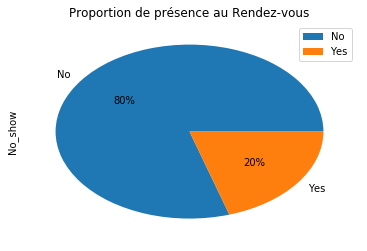

In [18]:
draw_function(df,'Proportion de présence au Rendez-vous')

- Conclusion: 80% des patients honore leur rendez-vous médical tandis que les 20% autres  non 

### Research Question 2  ( Quels sont les jours qui enregistre plus d'absences?)

- Cette question concerne uniquement les patients absents au rendew vous. Enregistrons donc les données de ces patients sur df_Noshow et analysons les abscences par jour

In [19]:

df_Noshow=df.query('No_show =="Yes"')
df_Noshow


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
21,12154843752835,5628338,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes
22,863229818887631,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,Yes
31,311284853849,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
44,274164858852,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
48,8545415176986,5618643,F,2016-04-26 07:19:49+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes


- Ajoutons la colonne Day au tableau df_Noshow et ajoutons y le jour de la semaine correspondant au scheduledDay enregistré

In [20]:
df_Noshow['Day']=df_Noshow.ScheduledDay.dt.day_name()
df_Noshow.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Day
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,Tuesday
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,Thursday
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,Wednesday


- Tracons histogramme des abscences regroupées en jour de la semaine

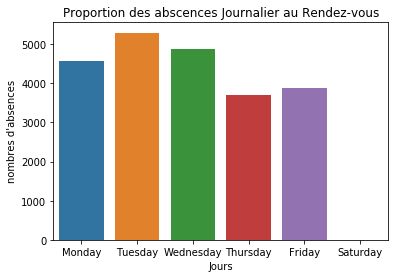

In [21]:
order2 = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(df_Noshow.Day, order= order2)
plt.title('Proportion des abscences Journalier au Rendez-vous')
plt.legend()
plt.xlabel("Jours")
plt.ylabel("nombres d'absences")
plt.show()



- A première vue, les abscences sont plus enregistrées en semaine. il ya très peu d'abscences le samedi. Le dimanche n'est pas répertorié peu être parce qu'aucun rendez vous ne se fait le dimanche.
- Nous pouvons donc conclure que les patients sont plus disponible le samedi(weekend) que pendant les jours ouvrables de la semaine

### Research Question 3 (Qui des diabetiques et des hypertendus sont plus absents au rendez vous?)


- Etudions le cas des diabetiques

In [22]:

df_diabetes = df.query('Diabetes==1')
df_diabetes.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
36,72984587621439,5637975,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,1578131861739,5637986,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No
41,822432466381793,5633339,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARUÍPE,0,0,1,0,0,0,No
44,274164858852,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes


- Représentons graphiquement l'abscence des diabétiques au rendez vous 

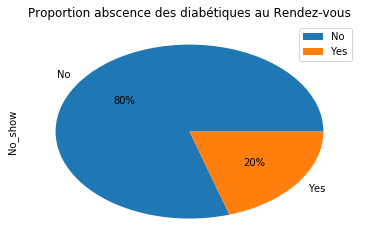

In [23]:
draw_function(df_diabetes, 'Proportion abscence des diabétiques au Rendez-vous')


- 18% des patients diabetique manque le rendez vous tandis que 82% honorent leur rendez vous

- Etudions le cas des hypertendus

In [24]:
#def f(i):
   # for i in df.columns():
        #return df.query('i==1')
df_hypertendu = df.query('Hypertension==1')
df_hypertendu.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
25,5819369978796,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,No
26,25787851512,5641781,F,2016-04-29 14:19:42+00:00,2016-04-29 00:00:00+00:00,45,BENTO FERREIRA,0,1,0,0,0,0,No


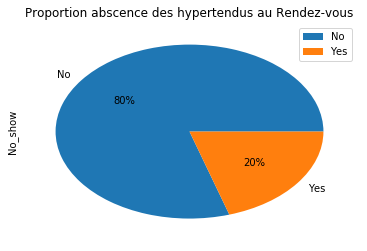

In [25]:
draw_function(df_hypertendu, 'Proportion abscence des hypertendus au Rendez-vous')


- 17 % des hypertendus manque leur rendez vous et les autres 83% honore leur rendez vous

-  Conclusion: les Diabétiques sont plus absents au rendez-vous que les hypertendus.

### Research Question 4: Est ce que recevoir un sms de rappel augmente les chances d'honorer au rendez vous?

- Filtrons les données, sélectionnons les patients qui ont recus les un sms et enregistrons le sur df_sms

In [26]:
df_sms = df.query('SMS_received==1')

df_sms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 11 to 110526
Data columns (total 14 columns):
PatientId         35482 non-null int64
AppointmentID     35482 non-null int64
Gender            35482 non-null object
ScheduledDay      35482 non-null datetime64[ns, UTC]
AppointmentDay    35482 non-null datetime64[ns, UTC]
Age               35482 non-null int64
Neighbourhood     35482 non-null object
Scholarship       35482 non-null int64
Hypertension      35482 non-null int64
Diabetes          35482 non-null int64
Alcoholism        35482 non-null int64
Handicap          35482 non-null int64
SMS_received      35482 non-null int64
No_show           35482 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 4.1+ MB


- 35482 patients ont recu un sms

- Faisons pareil pour les patients n'ayant pas de sms

In [27]:
df_Nosms=df.query('SMS_received==0')
df_Nosms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75044 entries, 0 to 110517
Data columns (total 14 columns):
PatientId         75044 non-null int64
AppointmentID     75044 non-null int64
Gender            75044 non-null object
ScheduledDay      75044 non-null datetime64[ns, UTC]
AppointmentDay    75044 non-null datetime64[ns, UTC]
Age               75044 non-null int64
Neighbourhood     75044 non-null object
Scholarship       75044 non-null int64
Hypertension      75044 non-null int64
Diabetes          75044 non-null int64
Alcoholism        75044 non-null int64
Handicap          75044 non-null int64
SMS_received      75044 non-null int64
No_show           75044 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 8.6+ MB


75044 n'ont pas recu de sms

- Dans le dataset des patients ayant recu un sms, remplacons les valeurs de la colonne No_show par 1 et 0. Soit Yes par 0 et No par 1

In [28]:
df_sms.No_show.replace({'Yes':1,'No':0}, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Les appelations Yes et No de la colonne No_show ont bien été respectivement remplacé par 1 et 0 dans le datataframe df_Sms

In [29]:
df_Nosms.No_show.replace({'Yes':1,'No':0}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Les appelations Yes et No de la colonne No_show ont bien été respectivement remplacé par 1 et 0 dans le datataframe df_Nosms

- Evaluons donc maintenant à l'aide de la moyenne. Ensuite, comparons la moyenne des patients absent ayant recu un sms et ne se sont pas présenté au rendez vous à celle de ceux n'ont pas recu de sms et  

In [30]:
df_sms.No_show.mean()

0.27574544839637

In [31]:
df_Nosms.No_show.mean()

0.16703533926762965

- df_Nosms.No_show.mean() < df_sms.No_show.mean() donc recevoir un sms de rappel n'augmente pas les chances d'honorer un rdv

<a id='conclusions'></a>
## Conclusions
>Au terme de ce travail, il était question pour nous de collecter, évaluer et nettoyer les données de rendez vous médical des patients dans les hopitaux du Brésil.  Nous avons:
> - collecté les données à travers le fichier csv, 
> - recherché les problèmes de qualité et d'ordre en inspectant le dataframe colonne après colonne.
> Il en ressort que
Notre fichier comporte 110527 lignes et 14 columns(présentées à l'introduction).
Nous avons corrigé les noms des colonnes aui étaient mal renseigné(Hipertension, Handcap, No-show), Nous avons changé le typage de certaines colonnes(PatientId en int,ScheduledDay et AppointmentDay en date).
Pour ce qui est de l'exploration des données, nous avons étudier les proportions de présences au rendez vous, les jours qui enregistre plus d'absences. Nous avons fait une étude comparative sur le taux d'abscence des diabetiques et des hypertendus rendez vous. A la fin, nous avons évaluer si un sms de rappel augmente les chances d'honorer un rendez-vous. les conclusions obtenues sont les suivantes:
> - 80% des patients honore leur rendez-vous médical tandis que les 20% autres non;
> -les abscences sont plus enregistrées en semaine. il ya très peu d'abscences le samedi; 
>- les patients diabétiques sont plus absents au rendez-vous que lespatients hypertendus;
>- recevoir un sms de rappel n'augmente pas les chances d'honorer un rdv. Cependant ce résultat peut aussi être dû au nombre élevé des patients n'ayant pas recu de sms.
### Perspective
>- Le dimanche n'étant pas répertorié, pouvons nous affirmer qu'aucun rendez n'est valable ce jour?
### Limites
>- Le fichier ne prend pas en compte les patients qui  personnes qui ont honoré de leur rendez le jour dit mais pas à l'heure convenu.
>- Aussi, nous ne pouvons analyser les absences en fonction de la distance entre l'hopital et l'addresse du patient. ce facteur pourrait aussi être important pour justifier le fait qu'un patient n'honore pas son rendez vous. 
>- Pourquoi recevoir un sms n'augmente t'il  pas les chances du patient d'honorer son rendez-vous pourtant ceci represente un sms de rappel?
### References
> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
https://www.tutorialspoint.com/python_pandas/python_pandas_function_application.htm



In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0